In [ ]:
import os
import zipfile

local_zip = '/content/drive/My Drive/Data for Learning/Google Play dataset/49864_274957_bundle_archive.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/content/drive/My Drive/Data for Learning/Google Play dataset')
zip_ref.close()

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np

data1_df = pd.read_csv('/content/drive/My Drive/Data for Learning/Google Play dataset/googleplaystore.csv')
data2_df = pd.read_csv('/content/drive/My Drive/Data for Learning/Google Play dataset/googleplaystore_user_reviews.csv')

In [5]:
print(data1_df.head(5))
print(data2_df.head(5))

                                                 App  ...   Android Ver
0     Photo Editor & Candy Camera & Grid & ScrapBook  ...  4.0.3 and up
1                                Coloring book moana  ...  4.0.3 and up
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ...  4.0.3 and up
3                              Sketch - Draw & Paint  ...    4.2 and up
4              Pixel Draw - Number Art Coloring Book  ...    4.4 and up

[5 rows x 13 columns]
                     App  ... Sentiment_Subjectivity
0  10 Best Foods for You  ...               0.533333
1  10 Best Foods for You  ...               0.288462
2  10 Best Foods for You  ...                    NaN
3  10 Best Foods for You  ...               0.875000
4  10 Best Foods for You  ...               0.300000

[5 rows x 5 columns]


In [6]:
print(data1_df.columns)
print(data2_df.columns)

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')
Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')


In [7]:
data1_df.describe(include ='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data1_df.drop_duplicates(inplace=True)

In [9]:
uniques = data1_df['Category'].unique()

In [10]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 18, 11
#plt.hist(data1_df['Category'],bins=len(data1_df['Category'].unique()))
for i in uniques:
    print(i,"  ",data1_df[data1_df['Category']== i ]['Category'].count())

ART_AND_DESIGN    65
AUTO_AND_VEHICLES    85
BEAUTY    53
BOOKS_AND_REFERENCE    230
BUSINESS    427
COMICS    60
COMMUNICATION    366
DATING    196
EDUCATION    130
ENTERTAINMENT    111
EVENTS    64
FINANCE    360
FOOD_AND_DRINK    124
HEALTH_AND_FITNESS    306
HOUSE_AND_HOME    80
LIBRARIES_AND_DEMO    85
LIFESTYLE    373
GAME    1121
FAMILY    1943
MEDICAL    408
SOCIAL    280
SHOPPING    224
PHOTOGRAPHY    322
SPORTS    351
TRAVEL_AND_LOCAL    237
TOOLS    843
PERSONALIZATION    388
PRODUCTIVITY    407
PARENTING    60
WEATHER    82
VIDEO_PLAYERS    175
NEWS_AND_MAGAZINES    264
MAPS_AND_NAVIGATION    137
1.9    1


In [11]:
data1_df=data1_df[data1_df['Category'] != '1.9']  # removing meaningless data from category column

In [12]:
uniques = data1_df['Rating'].unique()

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1.600e+01, 1.000e+00, 6.000e+00, 1.200e+01, 2.000e+01, 2.000e+01,
        5.300e+01, 2.000e+01, 4.700e+01, 8.500e+01, 1.510e+02, 2.920e+02,
        1.570e+02, 6.930e+02, 3.720e+02, 1.196e+03, 1.904e+03, 2.009e+03,
        1.480e+03, 3.580e+02]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4,
        3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ]),
 <a list of 20 Patch objects>)

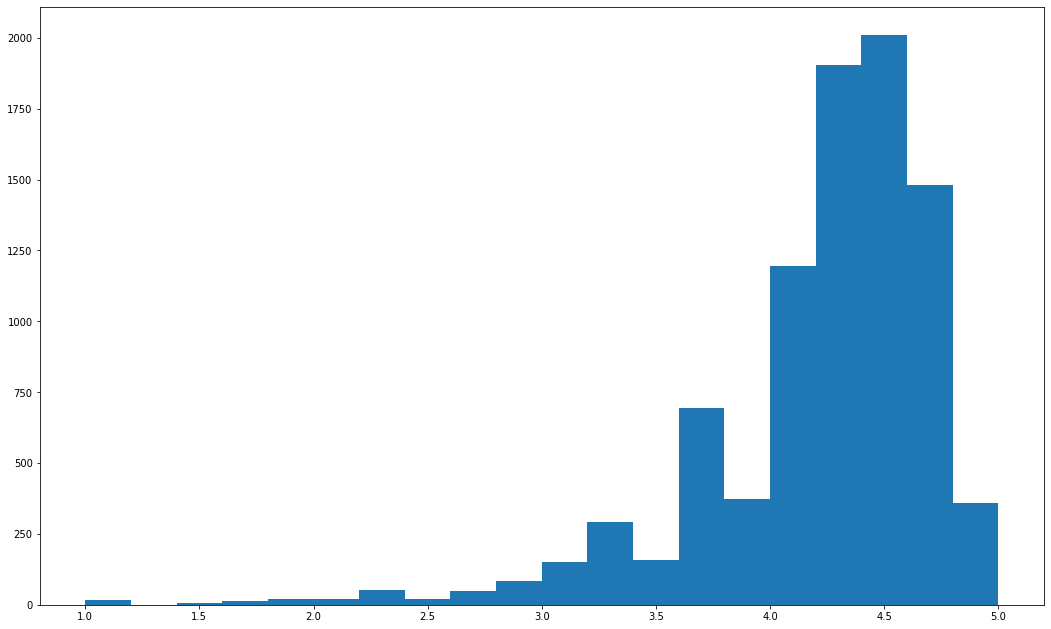

In [13]:
plt.hist(data1_df['Rating'],bins=20)
#for i in uniques:
    #print(i,"  ",data1_df[data1_df['Rating']== i ]['Rating'].count())

In [14]:
data1_df['Rating'].isnull().sum()

1465

In [15]:
data_pred_df = data1_df[data1_df['Rating'].isnull()]  # use as prediction data to get the ratings

In [16]:
data1_df = data1_df[~data1_df['Rating'].isnull()]

In [17]:
data1_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       2
dtype: int64

In [18]:
# understanding current version
data1_df[data1_df['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up


In [19]:
#uniques = data1_df['Current Ver'].unique()
#plt.hist(data1_df['Current Ver'])
#for i in uniques:
#    print(i,"  ",data1_df[data1_df['Current Ver']== i ]['Current Ver'].count())
# THEREFORE CURRENT VER IS NOT AS SIGNIFICANT AND UNIQUE AND IT WILL BE DROPPED out
data1_df.drop('Current Ver',axis=1)
data_pred_df.drop('Current Ver',axis=1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",4.0 and up


In [20]:
uniques = data1_df['Android Ver'].unique()
#plt.hist(data1_df['Android Ver'])
for i in uniques:
    print(i,"  ",data1_df[data1_df['Android Ver']== i ]['Android Ver'].count())

4.0.3 and up    1197
4.2 and up    331
4.4 and up    789
2.3 and up    573
3.0 and up    207
4.1 and up    1987
4.0 and up    1094
2.3.3 and up    238
Varies with device    1178
2.2 and up    203
5.0 and up    481
6.0 and up    46
1.6 and up    87
1.5 and up    16
2.1 and up    112
7.0 and up    41
4.3 and up    199
4.0.3 - 7.1.1    2
2.0 and up    27
3.2 and up    31
4.4W and up    5
5.1 and up    16
7.1 and up    3
7.0 - 7.1.1    1
8.0 and up    5
5.0 - 8.0    2
3.1 and up    8
2.0.1 and up    7
4.1 - 7.1.1    1
nan    0
5.0 - 6.0    1
1.0 and up    2


In [21]:
and_ver_df = data1_df['Android Ver'].astype(str)

In [22]:
# below written line gives first string element of each row od series !!!
and_ver_df.str.get(0)

def and_ver(x):
    if(x=='V' or x=='n'):
        return 4 
    else:
        return x# from getting mode and mean of others 

data1_df['Android_Ver'] = and_ver_df.str.get(0)

# we will take mode of all android versions and use for aps, that use Varies version with mobile
temp_and_ver_df = data1_df[(data1_df['Android_Ver']!='V') & (data1_df['Android_Ver']!='n')]['Android_Ver'].astype(int)
print(temp_and_ver_df.mean())
print(temp_and_ver_df.mode())
# therefore, we assign 4 anderoid version and above to apps with " varying with device version and to those with unknown "

data1_df['Android_Ver']=data1_df['Android_Ver'].apply(and_ver) 


3.7232883817427385
0    4
dtype: int64


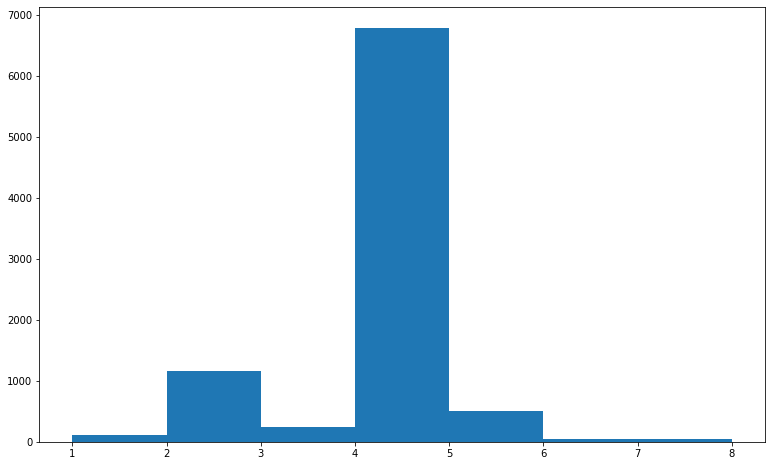

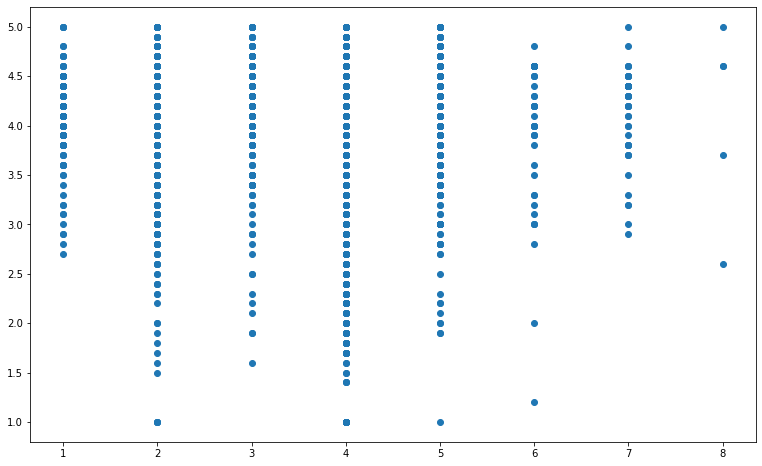

In [23]:
rcParams['figure.figsize'] = 13, 8
plt.hist(data1_df['Android_Ver'].astype(int),bins=7)
plt.show()
plt.scatter(data1_df['Android_Ver'].astype(int),data1_df['Rating'])


In [24]:
data1_df.drop(['Current Ver','Android Ver'],axis=1,inplace=True)
data1_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Android_Ver       0
dtype: int64

In [25]:
cols = data1_df.columns

for i in cols:
    print(i,"   ",data1_df[i].dtype)

App     object
Category     object
Rating     float64
Reviews     object
Size     object
Installs     object
Type     object
Price     object
Content Rating     object
Genres     object
Last Updated     object
Android_Ver     object


In [26]:
data1_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",4
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",4
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",4
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",4
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",4


In [27]:
# HANDELING 'CATEGORY' AND 'CONTENT RATING'

#print(data1_df['Category'].unique())
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

data1_df['Category_Label'] = label.fit_transform(data1_df['Category'])
data1_df['Content_Rating_Label'] = label.fit_transform(data1_df['Content Rating'])
#print(data1_df['Content_Rating_Label'].unique())

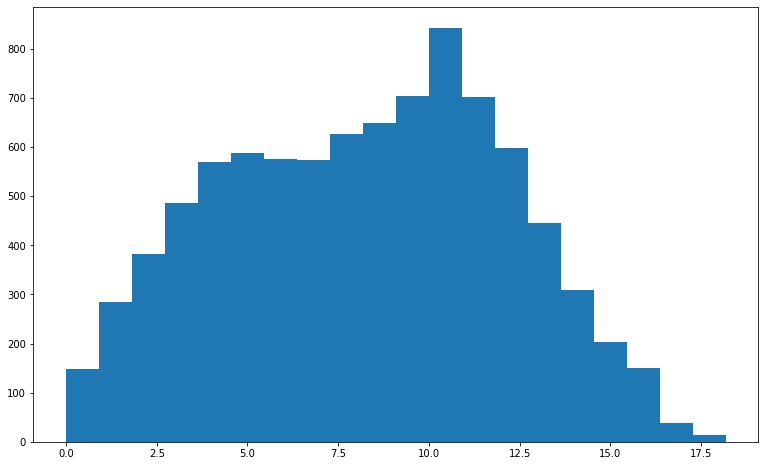

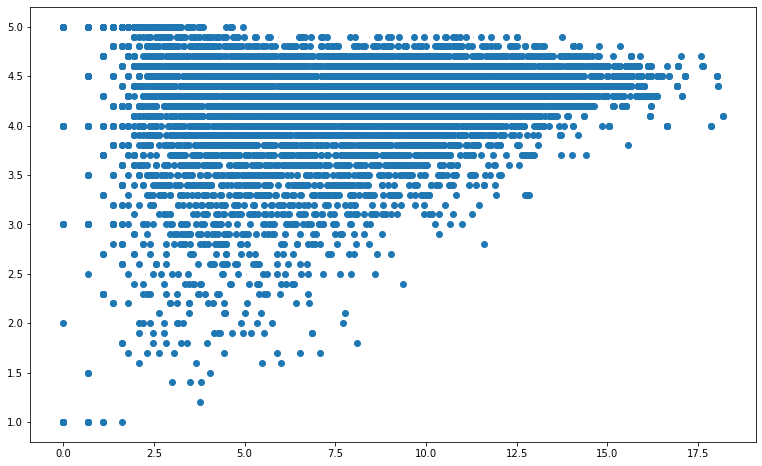

In [28]:
# we observe that reviews are unevenly spread, hence we make plots with logs of reviews, and it gives a more appropriate
# distribution and understanding to data
plt.hist(np.log(data1_df['Reviews'].astype(int)),bins=20)
plt.show()
plt.scatter(np.log(data1_df['Reviews'].astype(int)),data1_df['Rating'])

In [29]:
data1_df['Reviews_Log'] = np.log(data1_df['Reviews'].astype(int))
#print(data1_df['Reviews_Log'])

In [30]:
data1_df['Size']
# we need to remove M and k and convert to appropriate type, and fill others
#scaling and cleaning size of installation
def change_size(size):
    if 'M' in size:
        x = size[:-1]
        x = float(x)*1000000
        return(x)
    elif 'k' == size[-1:]:
        x = size[:-1]
        x = float(x)*1000
        return(x)
    else:
        return None

data1_df["Size"] = data1_df["Size"].map(change_size)

#filling Size which had NA
data1_df.Size.fillna(method = 'ffill', inplace = True)

#print(data1_df['Size'])

In [32]:
# handeling '+' sign in installs
def change_installs(install):
    if '+' in install:
        x = install[:-1]
        return(x)

data1_df["Installs_Size"] = data1_df["Installs"].map(change_installs)
#data1_df['Installs'].unique()
#filling Size which had NA


In [126]:
data1_df['Installs_Size'] = data1_df['Installs_Size'].str.replace(',', '')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
# converting type to label
data1_df['Type_Label'] = label.fit_transform(data1_df['Type'])

In [59]:
data1_df['Price']

4        0
5        0
6        0
7        0
8        0
        ..
10834    0
10836    0
10837    0
10839    0
10840    0
Name: Price, Length: 8888, dtype: object

In [62]:
data1_df['Price'].unique()

# handeling '$' sign in Price
def change_price(price):
    if '$' in price:
        x = price[1:]
        return(x)
    else:
        return 0
data1_df["Price_Num"] = data1_df["Price"].map(change_price)
data1_df['Price_Num'].unique()


array([0, '4.99', '3.99', '6.99', '7.99', '5.99', '2.99', '3.49', '1.99',
       '9.99', '7.49', '0.99', '9.00', '5.49', '10.00', '24.99', '11.99',
       '79.99', '16.99', '14.99', '29.99', '12.99', '2.49', '10.99',
       '1.50', '19.99', '15.99', '33.99', '39.99', '3.95', '4.49', '1.70',
       '8.99', '1.49', '3.88', '399.99', '17.99', '400.00', '3.02',
       '1.76', '4.84', '4.77', '1.61', '2.50', '1.59', '6.49', '1.29',
       '299.99', '379.99', '37.99', '18.99', '389.99', '8.49', '1.75',
       '14.00', '2.00', '3.08', '2.59', '19.40', '3.90', '4.59', '15.46',
       '3.04', '13.99', '4.29', '3.28', '4.60', '1.00', '2.95', '2.90',
       '1.97', '2.56', '1.20'], dtype=object)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Android_Ver,Category_Label,Content_Rating_Label,Reviews_Log,Installs_Size,Type_Label,Price_Num
4197,most expensive app (H),FAMILY,4.3,6,1500000.0,100+,Paid,$399.99,Everyone,Entertainment,"July 16, 2018",7,11,1,1.791759,100,1,399.99
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000000.0,"10,000+",Paid,$399.99,Everyone,Lifestyle,"March 11, 2018",4,18,1,6.576470,"10,000",1,399.99
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300000.0,"10,000+",Paid,$400.00,Everyone,Lifestyle,"May 3, 2018",4,18,1,5.616771,"10,000",1,400.00
5351,I am rich,LIFESTYLE,3.8,3547,1800000.0,"100,000+",Paid,$399.99,Everyone,Lifestyle,"January 12, 2018",4,18,1,8.173857,"100,000",1,399.99
5354,I am Rich Plus,FAMILY,4.0,856,8700000.0,"10,000+",Paid,$399.99,Everyone,Entertainment,"May 19, 2018",4,11,1,6.752270,"10,000",1,399.99


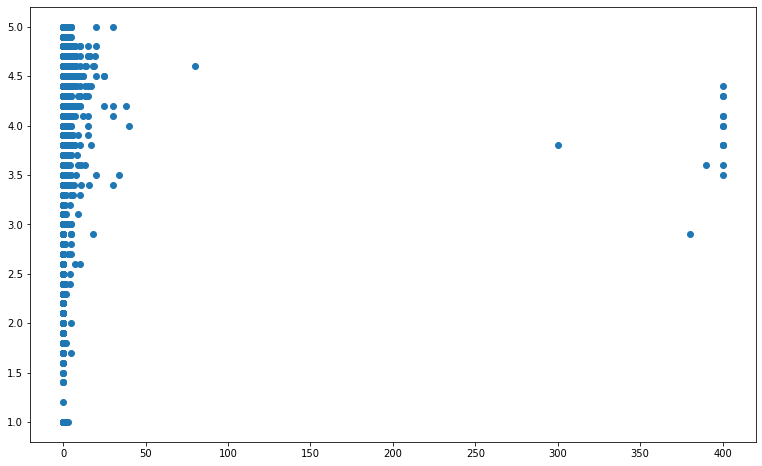

In [87]:
#plt.hist((data1_df['Price_Num'].astype(float)/100 ),bins=5)

#plt.scatter(data1_df['Price_Num'],data1_df['Rating'])

(data1_df[data1_df['Price_Num'].astype(float)>250].head(5))

In [88]:
# these apps with amounts greater than $200 are not realistic and seem fake. so we will remove theese apps
data1_df = data1_df[data1_df['Price_Num'].astype(float)<200]

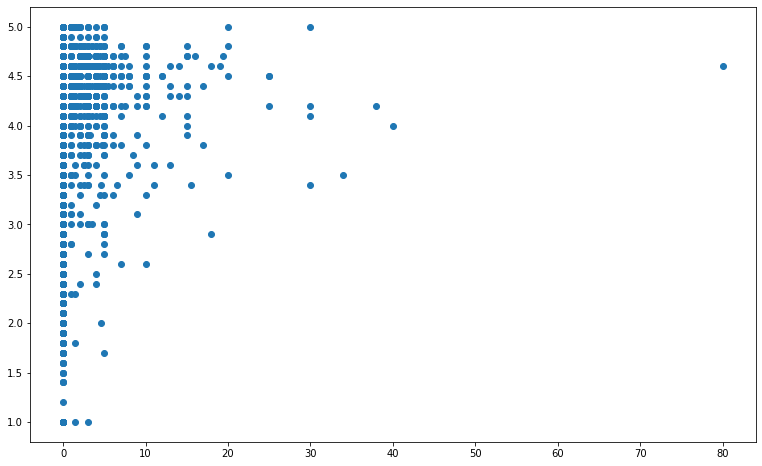

In [89]:
plt.scatter(data1_df['Price_Num'],data1_df['Rating'])

In [90]:
data1_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Android_Ver,Category_Label,Content_Rating_Label,Reviews_Log,Installs_Size,Type_Label,Price_Num
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",4,0,1,5.068904,"10,000",0,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",4,0,1,6.874198,"500,000",0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",4,0,1,11.379508,"5,000,000",0,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",4,0,4,12.281384,"50,000,000",0,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",4,0,1,6.874198,"100,000",0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600000.0,500+,Free,0,Everyone,Education,"June 18, 2017",4,11,1,1.945910,500,0,0
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",4,11,1,3.637586,"5,000",0,0
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600000.0,100+,Free,0,Everyone,Education,"July 6, 2018",4,11,1,1.386294,100,0,0
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,3600000.0,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",4,3,3,4.736198,"1,000",0,0


In [95]:
print(data1_df['Genres'].unique())
print(data1_df['Category'].unique())


['Art & Design' 'Art & Design;Pretend Play' 'Art & Design;Creativity'
 'Auto & Vehicles' 'Beauty' 'Books & Reference' 'Business' 'Comics'
 'Comics;Creativity' 'Communication' 'Dating' 'Education;Education'
 'Education' 'Education;Creativity' 'Education;Music & Video'
 'Education;Action & Adventure' 'Education;Pretend Play'
 'Education;Brain Games' 'Entertainment' 'Entertainment;Music & Video'
 'Entertainment;Brain Games' 'Entertainment;Creativity' 'Events' 'Finance'
 'Food & Drink' 'Health & Fitness' 'House & Home' 'Libraries & Demo'
 'Lifestyle' 'Lifestyle;Pretend Play' 'Adventure;Action & Adventure'
 'Arcade' 'Casual' 'Card' 'Casual;Pretend Play' 'Action' 'Strategy'
 'Puzzle' 'Sports' 'Music' 'Word' 'Racing' 'Casual;Creativity'
 'Casual;Action & Adventure' 'Simulation' 'Adventure' 'Board' 'Trivia'
 'Role Playing' 'Simulation;Education' 'Action;Action & Adventure'
 'Casual;Brain Games' 'Simulation;Action & Adventure'
 'Educational;Creativity' 'Puzzle;Brain Games' 'Educational;Educatio

In [96]:
#plt.scatter(data1_df['Category'],data1_df['Rating'])
#plt.show()
#plt.scatter(data1_df['Genres'],data1_df['Rating'])

# GENRE IS VERY COMPLEX DATA, AND CATEGRY WILL SOLVE OUR PURPOSE, SO WE WILL NOT BE USING GENRES !

In [99]:
data1_df['Android_Ver'] = data1_df['Android_Ver'].astype(int)
print(data1_df['Android_Ver'].dtype)

int64


In [106]:
# NOW we will check out last updated 
#data1_df['Last Updated']

# LEAVE LAST UPDATED DATA FOR NOW, AS THE DATA IS COMPLEX AND MIGHT NOT PROVIDE WITH SIGNIFICANT HELP 


In [109]:
data1_df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Android_Ver,Category_Label,Content_Rating_Label,Reviews_Log,Installs_Size,Type_Label,Price_Num
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",4,0,1,5.068904,"10,000",0,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",4,0,1,6.874198,"500,000",0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",4,0,1,11.379508,"5,000,000",0,0


In [127]:
# listing out all the modified columns which will be used for fitting model.

cols = ['Category_Label','Rating', 'Reviews_Log', 'Size','Installs_Size','Type_Label','Price_Num','Content_Rating_Label','Android_Ver']

data_processed = data1_df[cols]

In [128]:
for i in cols:
    print(data_processed[i].dtype," ",i)

int64   Category_Label
float64   Rating
float64   Reviews_Log
float64   Size
object   Installs_Size
int64   Type_Label
object   Price_Num
int64   Content_Rating_Label
int64   Android_Ver


In [129]:
# taking care of few remaining data types 
data_processed['Installs_Size'] = data_processed['Installs_Size'].astype(int)
data_processed['Price_Num'] = data_processed['Price_Num'].astype(float)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


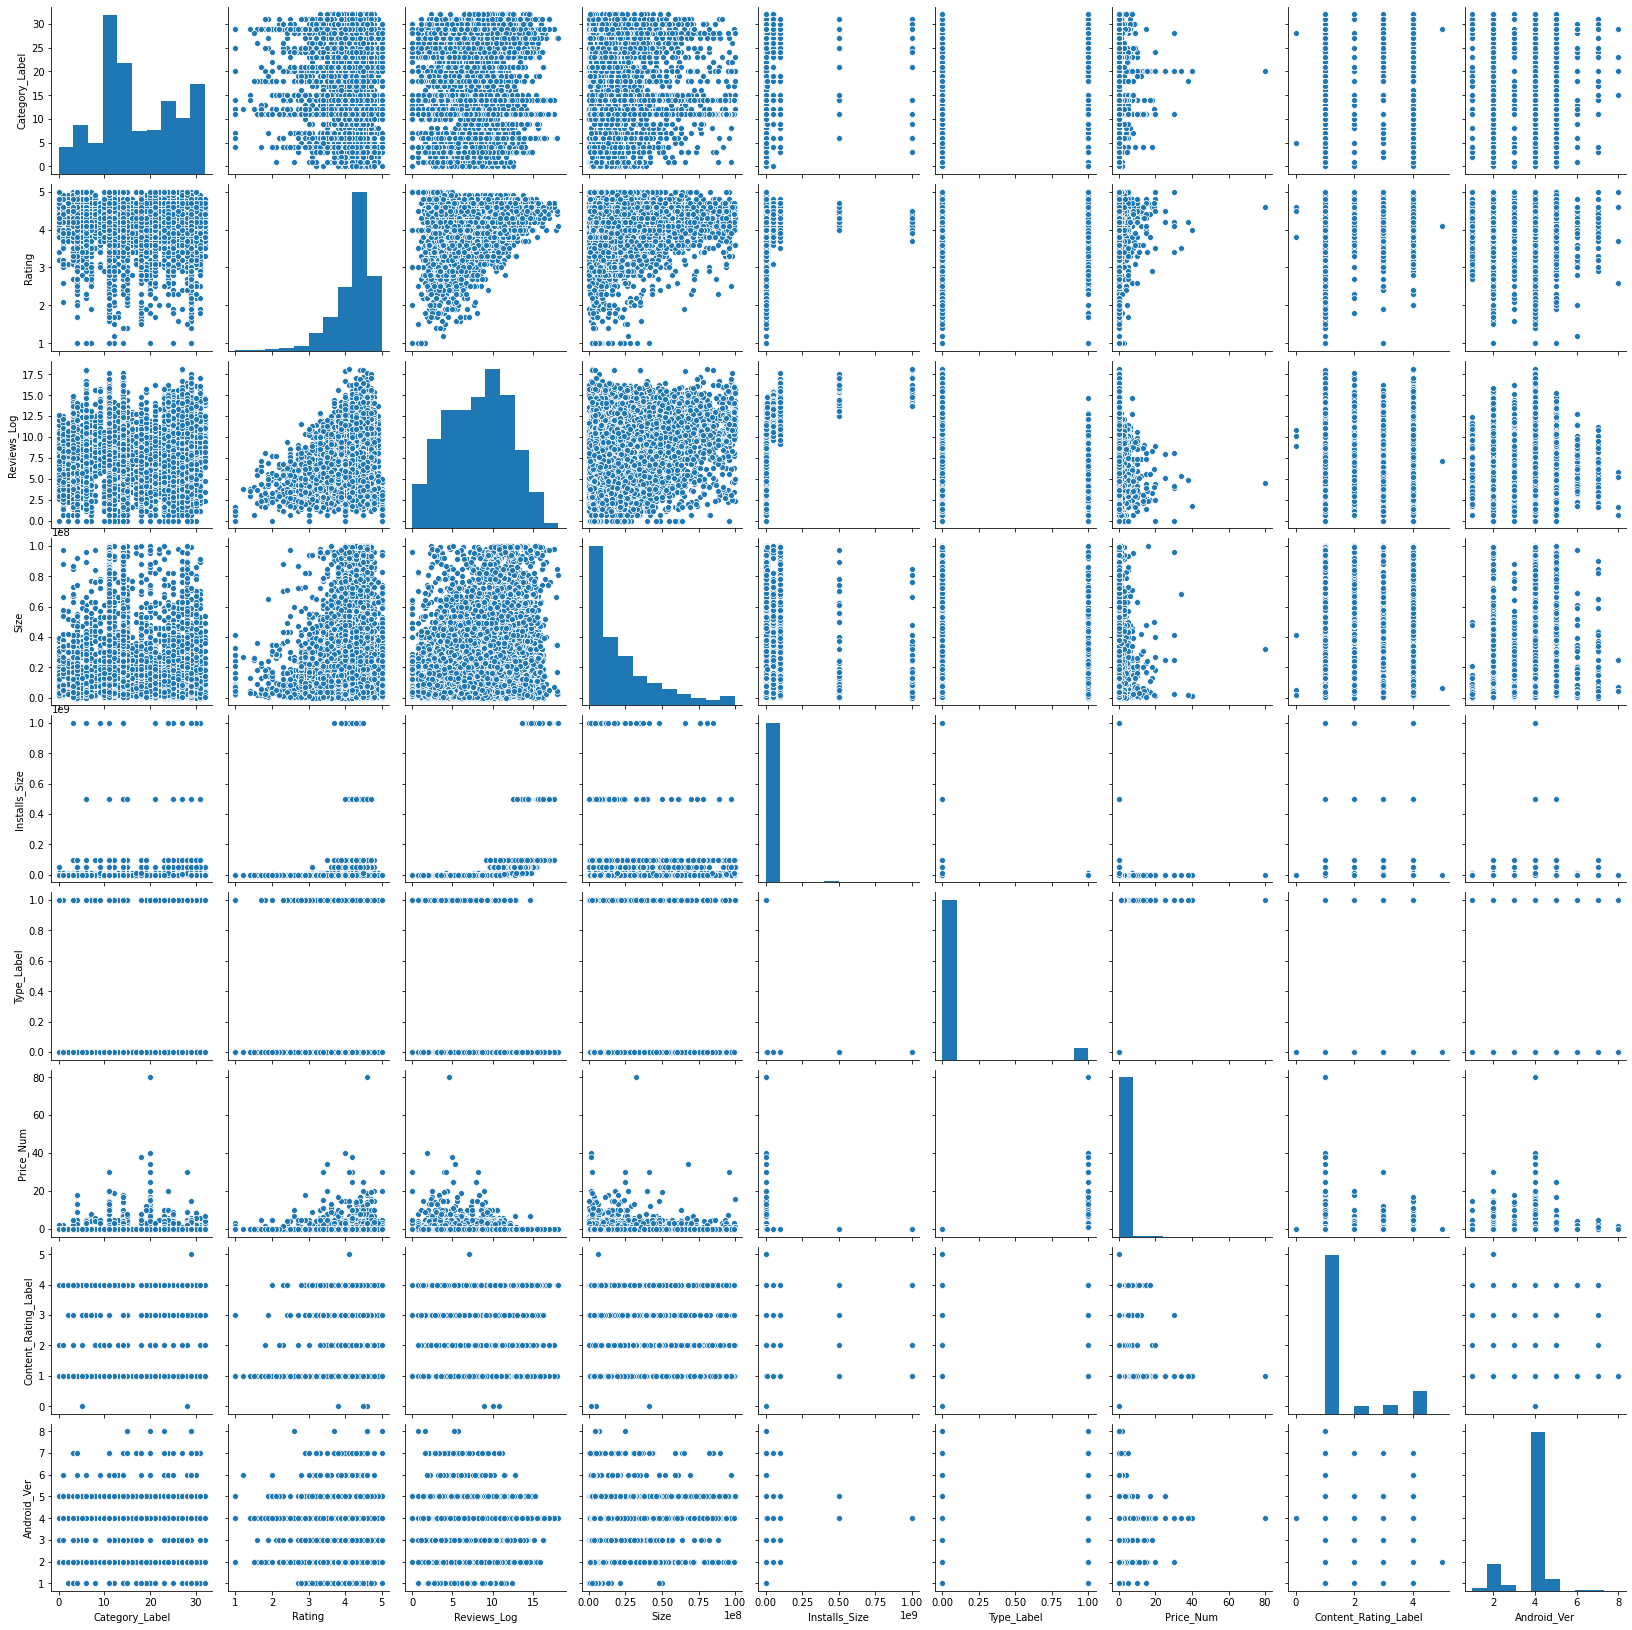

In [131]:
import seaborn as sns
sns.pairplot(data_processed)